# The Sparks Foundation
# Data Science and Business Analytics Internship ( GRIP August-21)
## Task 1 - Prediction Using Supervised Machine Learning
## Author - Induja Arun
## Problem Statement - Predict the score of a student based on study hours .

## <font color='orange'>STEP 1 : Importing required libraries</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wg
wg.filterwarnings("ignore")

## <font color='orange'>STEP 2 : Reading data from remote URL</font>

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

## <font color='orange'>STEP 3 : Understanding data</font>

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## <font color='orange'>STEP 4 : Visualizing the data</font>

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

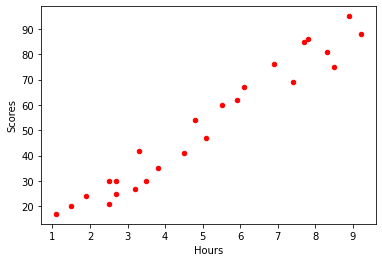

In [7]:
data.plot(kind='scatter',x='Hours',y='Scores',color='red')

#### This scatter plot shows positive linear relationship between number of hours studied and marks scored by a student .

In [8]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [10]:
hours = data['Hours']
scores = data['Scores']

<AxesSubplot:xlabel='Hours', ylabel='Density'>

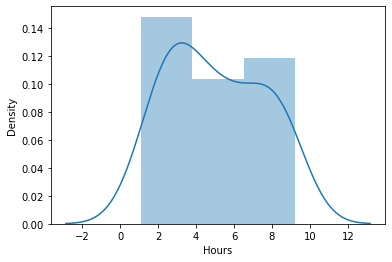

In [11]:
sns.distplot(hours)

<AxesSubplot:xlabel='Scores', ylabel='Density'>

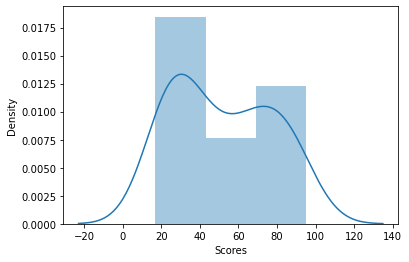

In [12]:
sns.distplot(scores)

## <font color='orange'>STEP 5 : Preparing the data and splitting into train and test sets </font>

In [13]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=50)

## <font color='orange'>STEP 6 : Training the model</font>

In [15]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

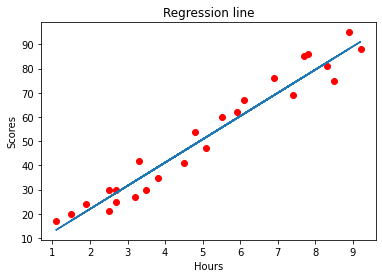

In [16]:
# Plotting the regresion line
m = reg.coef_
c = reg.intercept_
line = m*X + c
plt.scatter(X,Y,color = 'red')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression line")
plt.plot(X,line)
plt.show()

## <font color='orange'>STEP 7 : Making predictions</font>

In [17]:
Y_pred = reg.predict(X_test)

In [18]:
actual_predicted = pd.DataFrame({'Target':Y_test,'Predicted':Y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


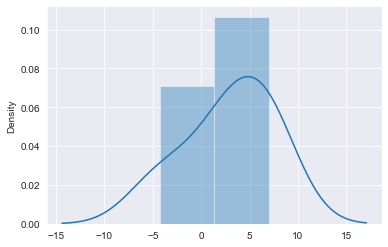

In [19]:
sns.set_style('darkgrid')
sns.distplot(np.array(Y_test-Y_pred))
plt.show()

## <font color='orange'>Let's predict the score if a student studies for 9.25 hours per day</font>

In [20]:
h = 9.25
s = reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score {} % in exam".format(h,s))

If a student studies for 9.25 hours per day he/she will score [91.56986604] % in exam


## <font color='orange'>Model Evaluation</font>

In [21]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error : ",metrics.mean_absolute_error(Y_test,Y_pred))
print("R2 score : ",r2_score(Y_test,Y_pred))

Mean Absolute Error :  4.5916495300630285
R2 score :  0.971014141329942


### RESULT : If a student studies for 9.25 hours per day he/she will score 91.56% in exam